# Convolutional Neural Network (CNN)

### Import TensorFlow

In [53]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, backend, optimizers
import matplotlib.pyplot as plt

In [24]:
backend.set_image_data_format('channels_last')

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


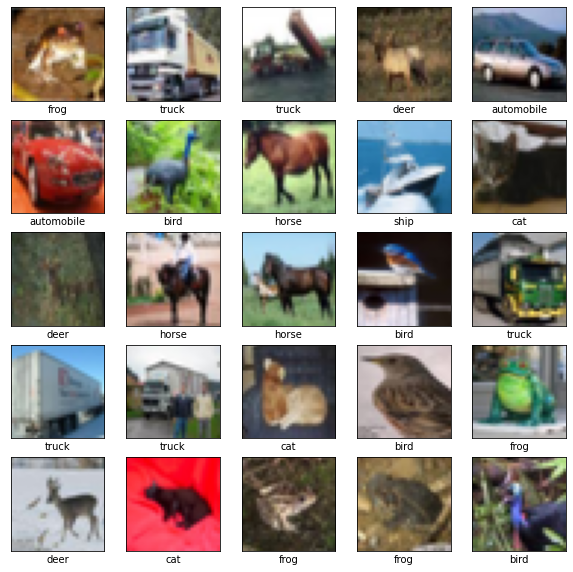

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of our model.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5159 - accuracy: 0.4481 - val_loss: 1.2952 - val_accuracy: 0.5483
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1531 - accuracy: 0.5924 - val_loss: 1.0648 - val_accuracy: 0.6238
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9889 - accuracy: 0.6520 - val_loss: 0.9854 - val_accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8963 - accuracy: 0.6875 - val_loss: 0.9291 - val_accuracy: 0.6742
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8187 - accuracy: 0.7155 - val_loss: 0.9025 - val_accuracy: 0.6900
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7607 - accuracy: 0.7352 - val_loss: 0.8902 - val_accuracy: 0.6959
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7106 - accuracy: 0.7527 - val_loss: 0.8347 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 0.8719 - accuracy: 0.7079


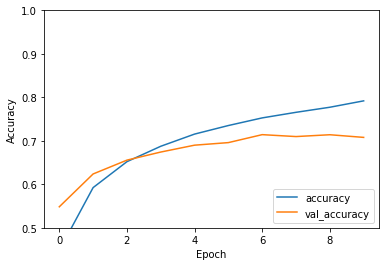

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
print(test_acc)

0.7078999876976013


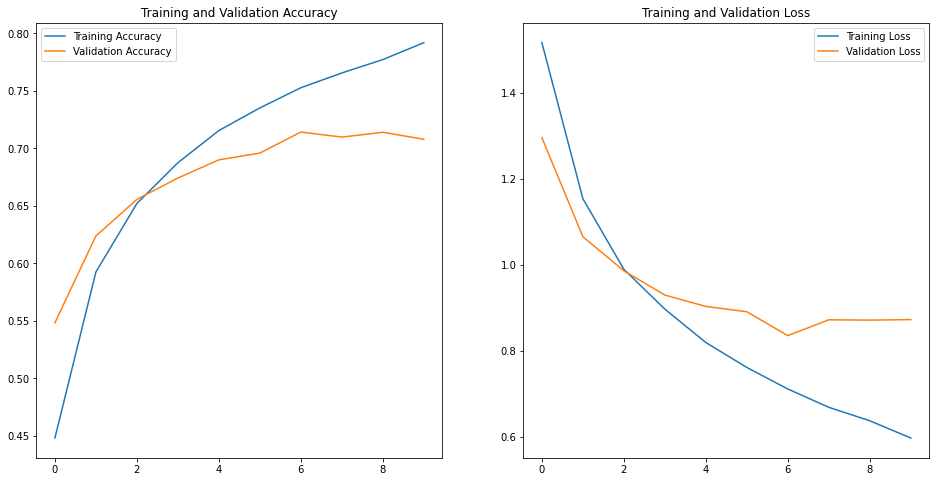

In [43]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:], activation='relu'))

model2.add(layers.Conv2D(32, (3, 3), activation='relu'))

model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))

model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)         

In [46]:
train_images.shape[1:]

(32, 32, 3)

In [66]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9884 - accuracy: 0.4720 - val_loss: 1.9563 - val_accuracy: 0.5039
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9988 - accuracy: 0.4617 - val_loss: 1.9451 - val_accuracy: 0.5157
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0035 - accuracy: 0.4572 - val_loss: 1.9699 - val_accuracy: 0.4910
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0300 - accuracy: 0.4308 - val_loss: 1.9917 - val_accuracy: 0.4691
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0262 - accuracy: 0.4346 - val_loss: 1.9905 - val_accuracy: 0.4700
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0657 - accuracy: 0.3952 - val_loss: 2.0972 - val_accuracy: 0.3637
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0624 - accuracy: 0.3987 - val_loss: 2.0473 - val_accuracy:

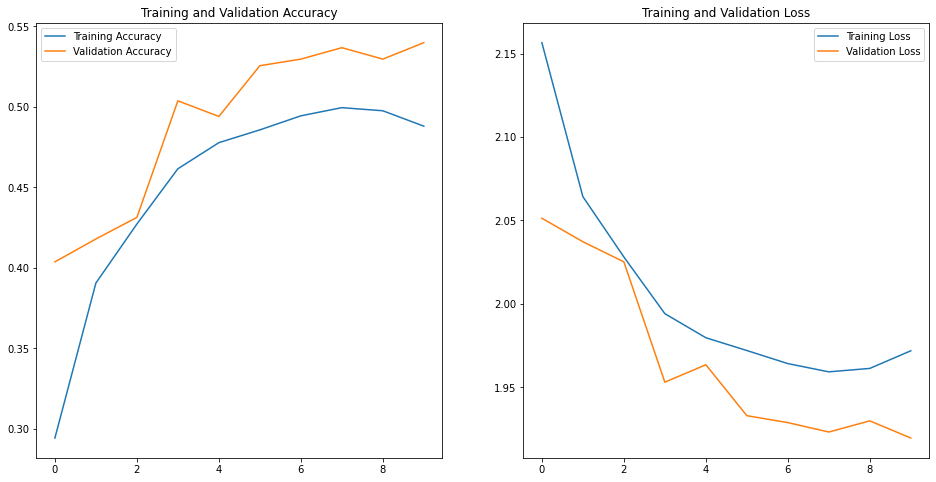

In [57]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.9196 - accuracy: 0.5398


In [58]:
model2.save('model.h5')

In [59]:
saved_model = models.load_model('model.h5')

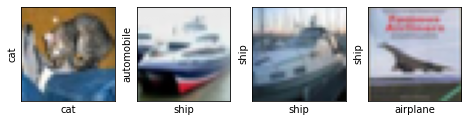

In [64]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
    plt.ylabel(class_names[model2.predict_classes(test_images[[i], :])[0]])
plt.show()

In [74]:
y = model2.predict(test_images)
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)